In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import lmdb 
print("TensorFlow version:", tf.__version__)
import skimage
from skimage import io

TensorFlow version: 2.0.0


(218, 178, 3)


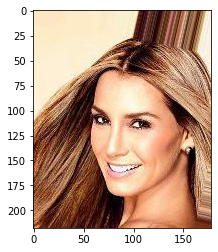

In [25]:
image = io.imread("./img_align_celeba/000001.jpg")
plt.imshow(image)
print(image.shape)

In [26]:
import cv2
import struct
from struct import pack
from struct import unpack
import skimage.transform

In [38]:
im_size = (96, 96)
def write_image_todatabase():
    env = lmdb.open("./data", map_size=int(1e14)) 
    txn = env.begin(write=True) 
    imageset_path='./img_align_celeba'
    for i in range(15000):
        if(i<9):
            img_name="./img_align_celeba/00000{}.jpg".format(i+1)
        elif(i<99):
            img_name="./img_align_celeba/0000{}.jpg".format(i+1)
        elif(i<999):
            img_name="./img_align_celeba/000{}.jpg".format(i+1)
        elif(i<9999):
            img_name="./img_align_celeba/00{}.jpg".format(i+1)
        elif(i<99999):
            img_name="./img_align_celeba/0{}.jpg".format(i+1)
        else:
            img_name="./img_align_celeba/img_align_celeba/{}.jpg".format(i+1)
        image = skimage.io.imread(img_name)
        image = skimage.transform.resize(image, im_size, order=3)
        image = image*255
        image = image.astype(int)
        _, t = cv2.imencode('.jpg', image)
        label = pack('i', i+1)
        txn.put(key = label, value = t)
    txn.commit() 
    env.close()

In [39]:
write_image_todatabase()

In [33]:
env = lmdb.open("./data") 
env_db = lmdb.Environment('data')
  
txn = env_db.begin() 
img = []
label = []
for key, value in txn.cursor():
    
    img.append(cv2.imdecode(np.frombuffer(value, np.uint8), cv2.IMREAD_UNCHANGED))
    value = unpack('i',key)[0]
    label.append(value)

In [34]:
print(len(img))
plt.imshow(img[4999])
print(label[4999])

0


IndexError: list index out of range